# Gender Prediction By Name

In [ ]:
!pip install names-dataset
!pip install Faker

In [ ]:
!pip install matplotlib

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [60]:
from names_dataset import NameDataset
from faker import Faker
fake = Faker(['en_US','fa'])
nd = NameDataset()

# Make a fake data frame

In [61]:
df = pd.DataFrame(
    {
    "people" : [fake.name() for _ in range(10000)],
    }
)

In [62]:
df

,people
0,Teresa Townsend
1,Pamela Franco
2,آرمين ولاشجردی
3,رقيه دایی
4,Michelle Lee
...,...
9995,Heather Guerrero
9996,علی رضا شاکری
9997,آرتين ضابطی
9998,جناب آقای دکتر ياسين ابوطالبی


## split full_name to first_name and last_name

In [63]:
def extract_name_parts(full_name):
    # Use regular expression to find titles and suffixes
    title_suffix_pattern = r'\b(?:Mr\.|Mrs\.|Ms\.|Dr\.|DVM|MD|جناب|آقای|دکتر|خانم|سرکار)\s?\b'

    # Remove titles and suffixes from the full name
    name_without_title_suffix = re.sub(title_suffix_pattern, '', full_name, flags=re.IGNORECASE)

    # Split the name into words
    words = name_without_title_suffix.split()

    # First name is the combination of all words except the last one
    first_name = ' '.join(words[:-1])

    # Last name is the last word
    last_name = words[-1]

    return first_name, last_name

### Add first name and last name column to data frame

In [64]:
df['first name'] = df['people'].apply(lambda fn : extract_name_parts(fn)[0])
df['last name'] = df['people'].apply(lambda ln : extract_name_parts(ln)[1])
df

,people,first name,last name
0,Teresa Townsend,Teresa,Townsend
1,Pamela Franco,Pamela,Franco
2,آرمين ولاشجردی,آرمين,ولاشجردی
3,رقيه دایی,رقيه,دایی
4,Michelle Lee,Michelle,Lee
...,...,...,...
9995,Heather Guerrero,Heather,Guerrero
9996,علی رضا شاکری,علی رضا,شاکری
9997,آرتين ضابطی,آرتين,ضابطی
9998,جناب آقای دکتر ياسين ابوطالبی,ياسين,ابوطالبی


## finding gender method

In [65]:
def name_to_gender(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return max(info['gender'], key=info['gender'].get)

In [66]:
def name_to_gender_probability(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return info['gender'][max(info['gender'], key=info['gender'].get)]

### add gender column to data frame

In [67]:
df['gender'] = df['first name'].apply(lambda name : name_to_gender(name))

In [68]:
df['gender probablity'] = df['first name'].apply(lambda name : name_to_gender_probability(name))

In [69]:
df

,people,first name,last name,gender,gender probablity
0,Teresa Townsend,Teresa,Townsend,Female,0.993
1,Pamela Franco,Pamela,Franco,Female,0.990
2,آرمين ولاشجردی,آرمين,ولاشجردی,Male,0.846
3,رقيه دایی,رقيه,دایی,Female,0.906
4,Michelle Lee,Michelle,Lee,Female,0.988
...,...,...,...,...,...
9995,Heather Guerrero,Heather,Guerrero,Female,0.996
9996,علی رضا شاکری,علی رضا,شاکری,Male,0.968
9997,آرتين ضابطی,آرتين,ضابطی,None,NaN
9998,جناب آقای دکتر ياسين ابوطالبی,ياسين,ابوطالبی,Male,0.863


## finding country method

In [70]:
def name_to_country(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return max(info['country'], key=info['country'].get)

In [71]:
def name_to_country_probability(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return info['country'][max(info['country'], key=info['country'].get)]

### add country column to data frame

In [72]:
df['country'] = df['first name'].apply(lambda name : name_to_country(name))

In [73]:
df['country probablity'] = df['first name'].apply(lambda name : name_to_country_probability(name))

In [74]:
df

,people,first name,last name,gender,gender probablity,country,country probablity
0,Teresa Townsend,Teresa,Townsend,Female,0.993,Italy,0.362
1,Pamela Franco,Pamela,Franco,Female,0.990,United States,0.234
2,آرمين ولاشجردی,آرمين,ولاشجردی,Male,0.846,"Iran, Islamic Republic of",0.474
3,رقيه دایی,رقيه,دایی,Female,0.906,Iraq,0.441
4,Michelle Lee,Michelle,Lee,Female,0.988,United States,0.421
...,...,...,...,...,...,...,...
9995,Heather Guerrero,Heather,Guerrero,Female,0.996,United States,0.624
9996,علی رضا شاکری,علی رضا,شاکری,Male,0.968,"Iran, Islamic Republic of",0.481
9997,آرتين ضابطی,آرتين,ضابطی,None,NaN,None,NaN
9998,جناب آقای دکتر ياسين ابوطالبی,ياسين,ابوطالبی,Male,0.863,Egypt,0.410


In [75]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [76]:
df

,people,first name,last name,gender,gender probablity,country,country probablity
0,Teresa Townsend,Teresa,Townsend,1.0,0.993,Italy,0.362
1,Pamela Franco,Pamela,Franco,1.0,0.990,United States,0.234
2,آرمين ولاشجردی,آرمين,ولاشجردی,0.0,0.846,"Iran, Islamic Republic of",0.474
3,رقيه دایی,رقيه,دایی,1.0,0.906,Iraq,0.441
4,Michelle Lee,Michelle,Lee,1.0,0.988,United States,0.421
...,...,...,...,...,...,...,...
9995,Heather Guerrero,Heather,Guerrero,1.0,0.996,United States,0.624
9996,علی رضا شاکری,علی رضا,شاکری,0.0,0.968,"Iran, Islamic Republic of",0.481
9997,آرتين ضابطی,آرتين,ضابطی,NaN,NaN,None,NaN
9998,جناب آقای دکتر ياسين ابوطالبی,ياسين,ابوطالبی,0.0,0.863,Egypt,0.410


In [86]:
top5 = df['country'].value_counts().head(5)
other_count = df['country'].nunique() - top5.shape[0]
other = pd.Series({'Other': other_count})

In [87]:
combined_categories = pd.concat([top5, other])

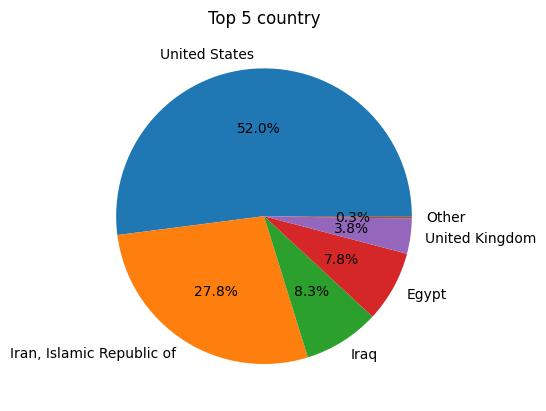

In [91]:
plt.pie(combined_categories, labels=combined_categories.index, autopct='%1.1f%%', startangle=0)
plt.title('Top 5 country')
plt.show()

In [92]:
!export PATH=/Library/TeX/texbin:$PATH